In [1]:
from main import *

## Gun Modelv2 small 0.001

OCC_Gun_modelv2_30/al_0.01_mu_1,100_sig_3.5e7,4.5e6/1e1-1e8_40_el_32925_ord_4_POD_13_1e-6/Data/
Opening files from this path =  OCC_Gun_modelv2_30/al_0.01_mu_1,100_sig_3.5e7,4.5e6/1e1-1e8_40_el_32925_ord_4_POD_13_1e-6/Data/
Eigenvalues closely spaced for Rtilde 0.0012982493376136736 0.01
Permutation 2
Eigenvalues closely spaced for Rtilde 0.0022584777886961414 0.01
Permutation 2
Eigenvalues closely spaced for Rtilde 0.00466096434188657 0.01
Permutation 2
Eigenvalues closely spaced for Rtilde 0.009877496541424877 0.01
Permutation 2


/Users/paulledger/Coding/Rodrigues_Angles/src/Fmeasure.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  Fexactconst[n] = np.abs(np.linalg.norm(R-I,ord='fro')**2 - diffeig) / np.abs(normalisation)
/Users/paulledger/Coding/Rodrigues_Angles/src/Commeasure.py:36: RuntimeWarning: divide by zero encountered in scalar divide
  Comexactconst[n] = np.abs(np.linalg.norm(Z,ord='fro')**2 ) / np.abs(normalisation)


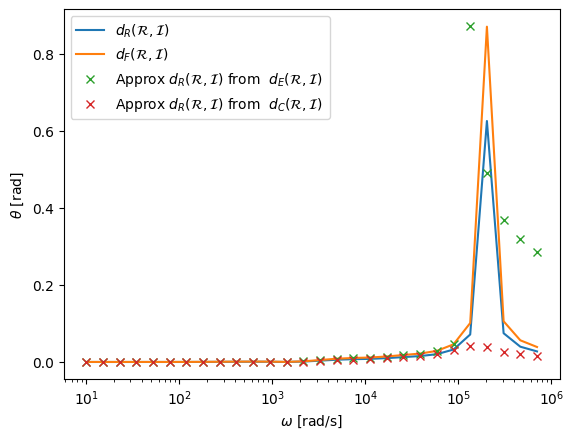

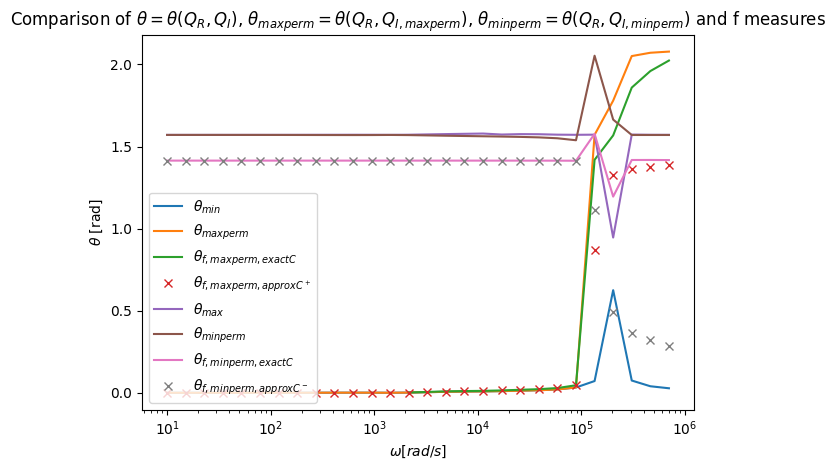

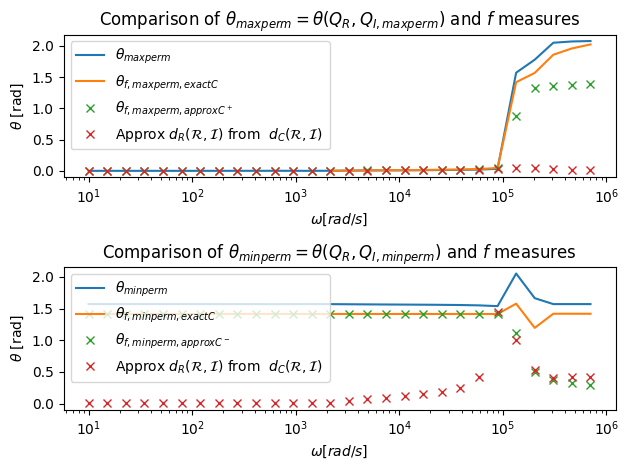

Computing F measure Tilde


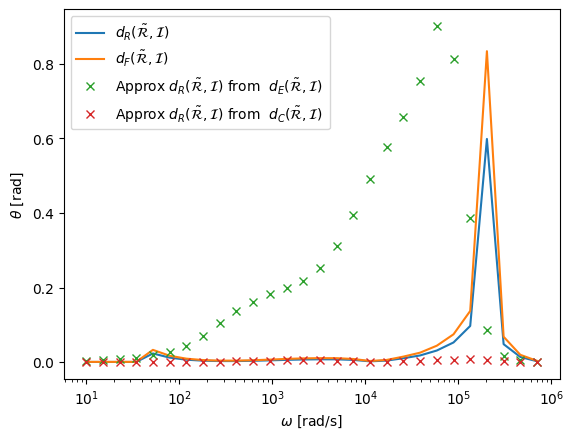

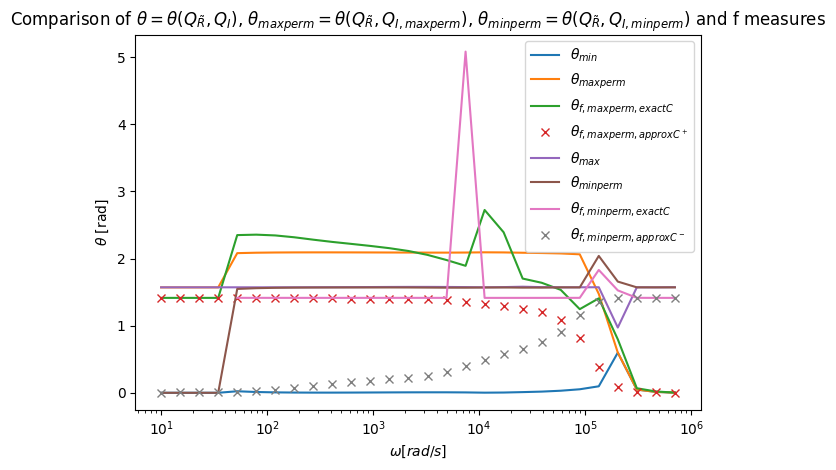

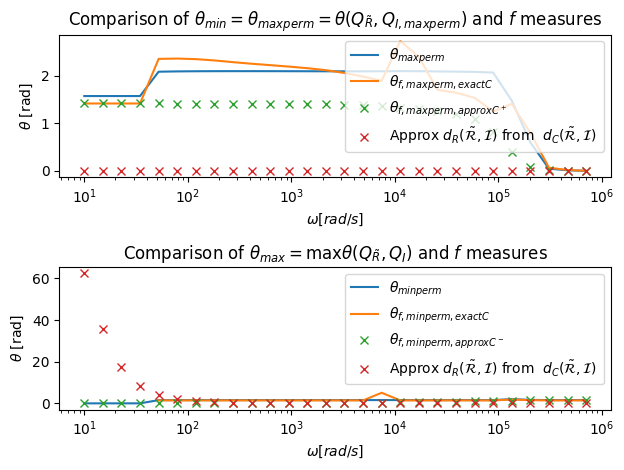

In [2]:
DirList=["OCC_Gun_modelv2_30/al_0.01_mu_1,100_sig_3.5e7,4.5e6/1e1-1e8_40_el_32925_ord_4_POD_13_1e-6/Data/"]
#DirList=["OCC_Gun_modelv2/al_0.01_mu_1,100_sig_3.5e7,4.5e6/1e1-1e8_40_el_25735_ord_5_POD_13_1e-6/Data/"]
SaveRIList=[]
SaveRtilde=[]

MaxOmega=1e6
for directory in DirList:
    print(directory)
    RIResults,RtildeIResults=main(directory,MaxOmega,Figures="On")

dict_keys(['Frequencies', 'MinAnglestoreRI', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_max', 'AnglestoreRIfmeasapprxconstsortedmindiff_min', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_min', 'AnglestoreRIfmeasapprxconstsortedmindiff_max', 'dFMinAnglestoreRI', 'dFMaxAnglestoreRI', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_max', 'AnglestoreRIcommeasapprxconstsortedmindiff_min', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_min', 'AnglestoreRIcommeasapprxconstsortedmindiff_max'])


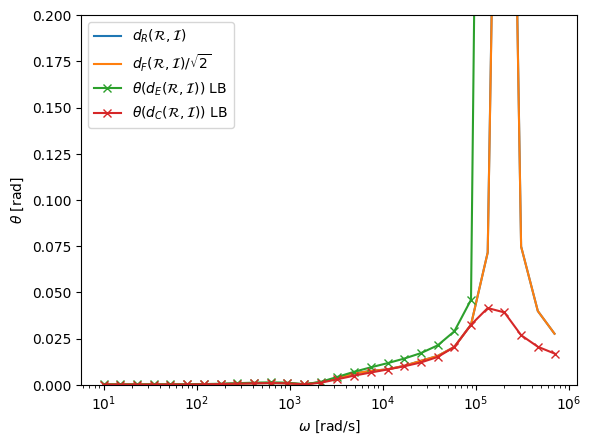

In [5]:
print(RIResults.keys())

Frequencies=RIResults["Frequencies"]
MinAnglestoreRI=RIResults["MinAnglestoreRI"]
AnglestoreRIfmeasapprxconstsortedmaxdiff_max=np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
AnglestoreRIcommeasapprxconstsortedmaxdiff_max=np.fmin(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])

AnglestoreRIfmeasupper=np.fmax(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_min"])
AnglestoreRIfmeaslower=np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_min"])

AnglestoreRIfmeasupper=np.fmax(AnglestoreRIfmeasupper,RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
AnglestoreRIfmeaslower=np.fmin(AnglestoreRIfmeaslower,RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
AnglestoreRIfmeasavg=(AnglestoreRIfmeasupper+AnglestoreRIfmeaslower)/2

AnglestoreRIcommmupper=np.fmax(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_min"])
AnglestoreRIcommmlower=np.fmin(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_min"])
AnglestoreRIcommmavg = (AnglestoreRIcommmupper+AnglestoreRIcommmlower )/2

AnglestoreRIcommmupper=np.fmax(AnglestoreRIcommmupper,RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])
AnglestoreRIcommmlower=np.fmin(AnglestoreRIcommmlower,RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])
AnglestoreRIcommmavg = (AnglestoreRIcommmupper+AnglestoreRIcommmlower )/2



dFMinAnglestoreRI = RIResults["dFMinAnglestoreRI"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRI,label=r'$d_R({\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRI/np.sqrt(2),label=r'$d_F({\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRIfmeaslower,'-x',label=r'$\theta(d_E({\cal R},{\cal I}))$ LB')


plt.semilogx(Frequencies,AnglestoreRIcommmlower,'-x',label=r'$\theta(d_C({\cal R},{\cal I}))$ LB')

plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.ylim(0,0.2)
plt.legend()
#plt.savefig("OCC_dualbar_dRanddE_metrics_al_0.001_mu_1,1_sig_1e6,1e8_ord4.pdf")
plt.show()

dict_keys(['Frequencies', 'MinAnglestoreRtildeI', 'AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max', 'AnglestoreRtildeIfmeasapprxconstsortedmindiff_min', 'AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_min', 'AnglestoreRtildeIfmeasapprxconstsortedmindiff_max', 'AnglestoreRtildeIfmeasfullconstsortedmindiff', 'AnglestoreRtildeIfmeasfullconstsortedmaxdiff', 'dFMinAnglestoreRtildeI', 'dFMaxAnglestoreRtildeI', 'AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max', 'AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_min', 'AnglestoreRtildeIcommeasapprxconstsortedmindiff_min', 'AnglestoreRtildeIcommeasapprxconstsortedmindiff_max'])


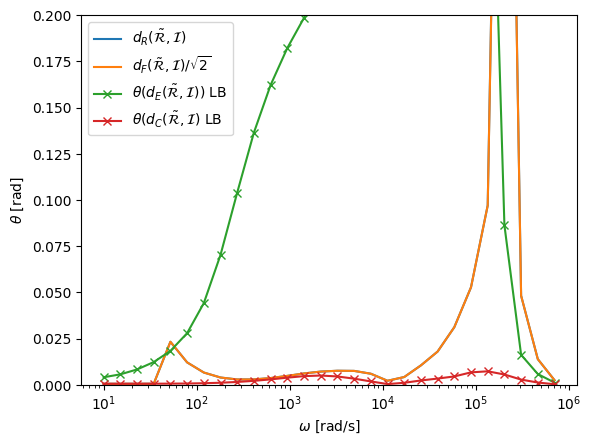

In [6]:
print(RtildeIResults.keys())

Frequencies=RtildeIResults["Frequencies"]
MinAnglestoreRtildeI=RtildeIResults["MinAnglestoreRtildeI"]
#AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max=RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"]
dFMinAnglestoreRtildeI = RtildeIResults["dFMinAnglestoreRtildeI"]
#AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max=np.fmin(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])
AnglestoreRtildeIfmeasupper=np.fmax(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])
AnglestoreRtildeIfmeaslower=np.fmin(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])

AnglestoreRtildeIfmeasupper=np.fmax(AnglestoreRtildeIfmeasupper,RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_min"])
AnglestoreRtildeIfmeaslower=np.fmin(AnglestoreRtildeIfmeaslower,RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_min"])

AnglestoreRtildeIfmeasavg=(AnglestoreRtildeIfmeasupper+AnglestoreRtildeIfmeaslower)/2

AnglestoreRtildeIfmeasfullconstsortedmindiff= RtildeIResults["AnglestoreRtildeIfmeasfullconstsortedmindiff"]

AnglestoreRtildeIcommmupper=np.fmax(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_min"])
AnglestoreRtildeIcommmlower=np.fmin(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_min"])

AnglestoreRtildeIcommmupper=np.fmax(AnglestoreRtildeIcommmupper,RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])
AnglestoreRtildeIcommmlower=np.fmin(AnglestoreRtildeIcommmlower,RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])


AnglestoreRtildeIcommmavg = (AnglestoreRtildeIcommmupper+AnglestoreRtildeIcommmlower )/2

AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max=np.fmin(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])

fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRtildeI,label=r'$d_R(\tilde{\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRtildeI/np.sqrt(2),label=r'$d_F(\tilde{\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRtildeIfmeaslower,'-x',label=r'$\theta(d_E(\tilde{\cal R},{\cal I}))$ LB')
plt.semilogx(Frequencies,AnglestoreRtildeIcommmlower,'-x',label=r'$\theta(d_C(\tilde{\cal R},{\cal I})$ LB ')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.ylim(0,0.2)
plt.legend()
#plt.savefig("OCC_dualbar_dRanddE_metrics_tilde_al_0.001_mu_1,1_sig_1e6,1e8_ord4.pdf")
plt.show()